In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D,Input,Dense,MaxPool2D,BatchNormalization,GlobalAvgPool2D

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

In [4]:
X_train=np.expand_dims(X_train,axis=-1)
X_test=np.expand_dims(X_test,axis=-1)

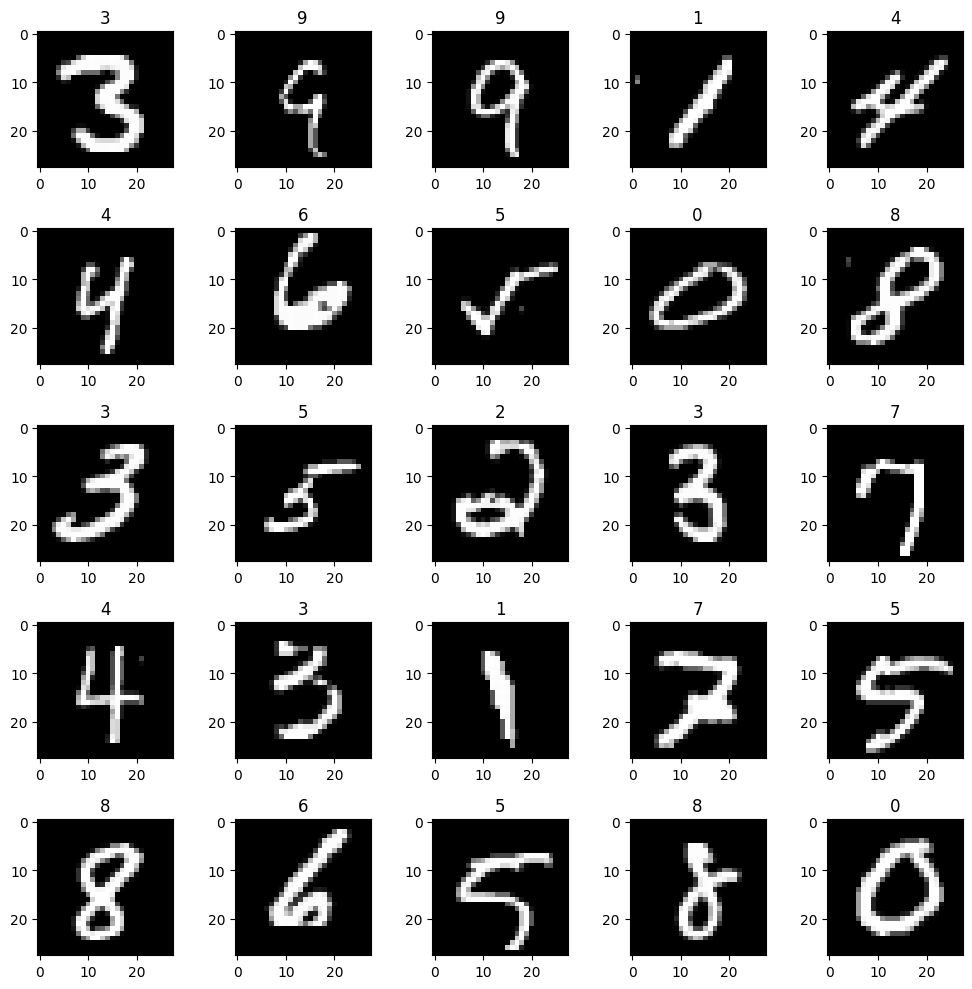

In [5]:
def display_some_examples(examples,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        idx=np.random.randint(0,examples.shape[0]-1)
        img=examples[idx]
        label=labels[idx]
        plt.subplot(5,5,i+1)
        plt.title(str(label))
        plt.tight_layout()
        plt.imshow(img,cmap="gray")
    plt.show()

display_some_examples(X_train, y_train)

In [6]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 28, 28, 1)
y_train.shape:  (60000,)
X_test.shape:  (10000, 28, 28, 1)
y_test.shape:  (10000,)


In [15]:
seq_model= tf.keras.Sequential(
[
    Input(shape=(28,28,1)),
    Conv2D(32,(3,3), activation="relu"),
    Conv2D(64,(3,3), activation="relu"),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(128,(3,3), activation="relu"),
    MaxPool2D(),
    BatchNormalization(),
    
    GlobalAvgPool2D(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
]
)

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [17]:
model.fit(X_train,y_train,batch_size=64,epochs=3, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 219s 290ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0620 - val_accuracy: 0.9815
Epoch 2/3
750/750 [==============================] - 203s 270ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 3/3
750/750 [==============================] - 199s 266ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0502 - val_accuracy: 0.9843


In [23]:
def functional_model():
    my_input=Input(shape=(28,28,1))
    x=Conv2D(32,(3,3), activation="relu")( my_input)
    x=Conv2D(64,(3,3), activation="relu")(x)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)
    
    x=Conv2D(128,(3,3), activation="relu")(x)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)
    
    x=GlobalAvgPool2D()(x)
    x=Dense(64, activation="relu")(x)
    x=Dense(10, activation="softmax")(x)
    
    model=tf.keras.Model(inputs=my_input,outputs=x)
    return model


In [24]:
model=functional_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")    
model.fit(X_train,y_train,batch_size=64,epochs=3, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 202s 269ms/step - loss: 0.2320 - accuracy: 0.9384 - val_loss: 0.1655 - val_accuracy: 0.9473
Epoch 2/3
750/750 [==============================] - 203s 271ms/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 0.0560 - val_accuracy: 0.9827
Epoch 3/3
750/750 [==============================] - 205s 274ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0645 - val_accuracy: 0.9789


In [37]:
class MyCustomModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        self.conv1=Conv2D(32,(3,3), activation="relu")
        self.conv2=Conv2D(64,(3,3), activation="relu")
        self.maxpool1=MaxPool2D()
        self.batchnormal1=BatchNormalization()
    
        self.conv3=Conv2D(128,(3,3), activation="relu")
        self.maxpool2=MaxPool2D()
        self.batchnormal2=BatchNormalization()
    
        self.globalavgpool1=GlobalAvgPool2D()
        self.dense1=Dense(64, activation="relu")
        self.dense2=Dense(10, activation="softmax")
    
    def call(self,my_input):
        x=self.conv1(my_input)
        x=self.conv2(x)
        x=self.maxpool1(x)
        x=self.batchnormal1(x)
    
        x=self.conv3(x)
        x=self.maxpool2(x)
        x=self.batchnormal2(x)
    
        x=self.globalavgpool1(x)
        x=self.dense1(x)
        x=self.dense2(x)
        
        return x
    

In [38]:
model= MyCustomModel()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")    
model.fit(X_train,y_train,batch_size=64,epochs=3, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 203s 269ms/step - loss: 0.2245 - accuracy: 0.9398 - val_loss: 0.1022 - val_accuracy: 0.9718
Epoch 2/3
750/750 [==============================] - 204s 272ms/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.0706 - val_accuracy: 0.9773
Epoch 3/3
750/750 [==============================] - 201s 268ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.1419 - val_accuracy: 0.9577
